In [129]:
import matplotlib.pyplot as plt
import numpy as np

In [349]:
x_0 = 0
x_s = 2000
T_in = 1
T_hold = 0.2
T_out = 2 - T_hold
delta_t = 10

In [350]:
t = np.arange(0, T_in + T_hold + T_out, delta_t/1000)
x = np.arange(0,len(t))
x_h = (x_s + x_0)/2

v_in = 2*((x_s-x_0)/T_in)
a_in = v_in**2/(x_s-x_0)

v_out = 2*((x_s-x_0)/T_out)
a_out = v_out**2/(x_s-x_0)

In [345]:
# Ideal S-curve
for i in range(len(t)):
    if t[i] < T_in/2:
        x[i] = x_0 + a_in*t[i]**2 / 2
    elif t[i] >= T_in/2 and t[i] < T_in:
        cur_t = t[i] - T_in/2
        x[i] = x_h + v_in*cur_t - a_in*cur_t**2/2
    elif t[i] >= T_in and t[i] < T_in + T_hold:
        x[i] = x_s
    elif t[i] >= T_in + T_hold and t[i] < T_in + T_hold + T_out/2:
        cur_t = t[i] - (T_in + T_hold)
        x[i] = x_s - a_out*cur_t**2 / 2
    else:
        cur_t = t[i] - (T_in + T_hold + T_out/2)
        x[i] = x_h - v_out*cur_t + a_out*cur_t**2/2

In [351]:
# Ideal S-curve with ms calculation
in_concave = 1000 * (T_in/2)
in_convex = 1000*T_in
hold_end = 1000*(T_in + T_hold)
out_convex = 1000*(T_in + T_hold + T_out/2)


for i in range(len(t)):
    t_ = delta_t * i
    if t_ < in_concave:
        
        x[i] = x_0 + a_in*(t_/1000.0)**2 / 2
        
    elif t_ >= in_concave and t_ < in_convex:
        
        cur_t = (t_ - in_concave)/1000.0
        x[i] = x_h + v_in*cur_t - a_in*cur_t**2/2
        
    elif t_ >= in_convex and t_ < hold_end:
        
        x[i] = x_s
        
    elif t_ >= hold_end and t_ < out_convex:
        
        cur_t = (t_ - hold_end)/1000.0
        x[i] = x_s - a_out*cur_t**2 / 2
        
    else:
        
        cur_t = (t_ - out_convex)/1000.0
        x[i] = x_h - v_out*cur_t + a_out*cur_t**2/2

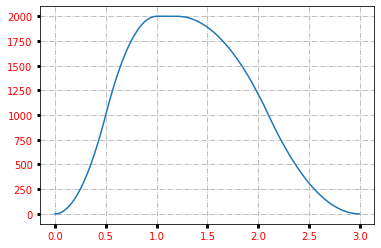

In [352]:
fig, ax = plt.subplots()
ax.plot(t, x)

ax.grid(True, linestyle='-.')
ax.tick_params(labelcolor='r', labelsize='medium', width=3)

plt.show()

In [338]:
len(x)

300

In [341]:
int(3 * (1000/10))

300

In [56]:
x_1 = 0
x_2 = 0
#v_s = np.sqrt(a_m * (x_s - x_0))
t_1 = v_s/a_m



999

In [127]:
# Linear formulation
for i in range(len(t)):
    # Phase 1
    if t[i] < t_1:
        x[i] = x_0 + a_m * (t[i]**2/2)
        x_1 = x[i]
    #Phase 2
    elif t[i] >= t_1 and t[i] < T - 2*t_1:        
        cur_t = t[i] - t_1
        x[i] = x_1 + v_s * cur_t
        x_2 = x[i]
    #Phase 3
    elif t[i] >= T - 2*t_1 and t[i] < T:        
        cur_t = t[i] - T + 2*t_1
        x[i] = x_2 + v_s*cur_t - a_m*(cur_t**2/2)
